Text(0.5, 1.0, '(array([0, 1]), array([55, 45]))')

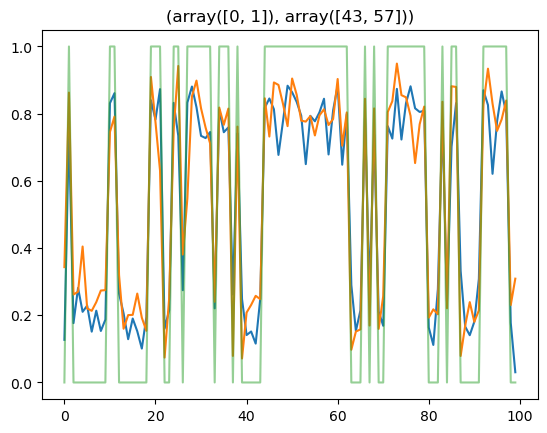

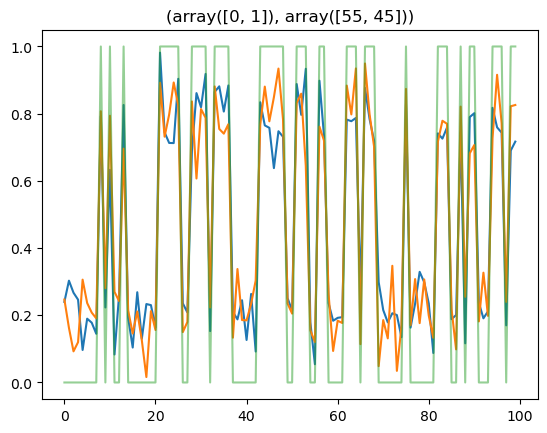

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

#params
dim = 2
classNum = 2
startProb = np.array([0.5, 0.5])
transMat = np.array([
    [0.7, 0.3],
    [0.3, 0.7]])
means = np.array([
    [0.2, 0.2],
    [0.8, 0.8]])
covar = 0.005
sampleNum = 100

# hmmSampler
def hmmSampler(dim, classNum, startProb, transMat, means, covar, sampleNum):
    model = hmm.GaussianHMM(n_components=classNum, covariance_type="full")
    model.startprob_ = startProb
    model.transmat_ = transMat
    model.means_ = means
    covars = covar * np.tile(np.identity(dim), (classNum, 1, 1))
    model.covars_ = covars
    X, Z = model.sample(sampleNum)
    X = X.reshape(-1, dim)
    Z = Z.reshape(-1, 1)
    
    return X, Z


# train data
np.random.seed(1234)
train_x, train_label = hmmSampler(dim, classNum, startProb, transMat, means, covar, sampleNum)
plt.figure()
plt.plot(train_x)
plt.plot(train_label, alpha=0.5)
plt.title(np.unique(train_label, return_counts=True))

# test data
np.random.seed(4321)
test_x, test_label = hmmSampler(dim, classNum, startProb, transMat, means, covar, sampleNum)
plt.figure()
plt.plot(test_x)
plt.plot(test_label, alpha=0.5)
plt.title(np.unique(test_label, return_counts=True))